In [694]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [695]:
if tf.config.list_physical_devices('GPU'):
  print('Usando GPU')
else:
  print('Usando CPU')

Usando CPU


In [696]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [697]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [698]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [699]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",name='1aCamadaEscondida'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [700]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1aCamadaEscondida (Dense)       │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [701]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [702]:
history = model.fit(X_train,
                    y_train,
                    epochs=2,
                    validation_data=(X_valid, y_valid)
                  )

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8895 - loss: 0.3671 - val_accuracy: 0.9688 - val_loss: 0.1065
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9702 - loss: 0.0956 - val_accuracy: 0.9724 - val_loss: 0.0927


In [703]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.9641 - loss: 0.1140


[0.0919203981757164, 0.9710000157356262]

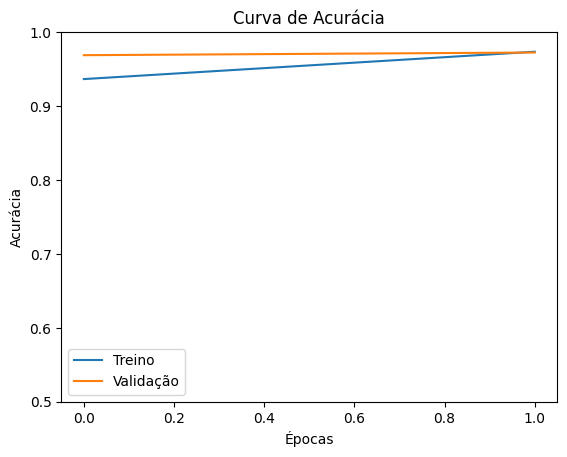

In [709]:
import matplotlib.pyplot as plt

# Plotando as curvas de perda (loss)
# plt.plot(history.history['loss'], label='Treino')
# plt.plot(history.history['val_loss'], label='Validação')
# plt.title('Curva de Perda')
# plt.xlabel('Épocas')
# plt.ylabel('Perda')
# plt.legend()
# plt.show()

# Plotando as curvas de acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.ylim(0.5, 1.0)

plt.show()


In [705]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[4.1476889e-07, 2.6233063e-06, 1.2468686e-04, 1.2012227e-04,
        4.1811128e-07, 7.5146215e-07, 2.0735607e-09, 9.9966526e-01,
        7.3101673e-06, 7.8395133e-05],
       [3.0977840e-09, 2.1058305e-04, 9.9978274e-01, 6.5776553e-06,
        1.2944101e-11, 1.5828866e-07, 2.8926522e-08, 7.5705092e-10,
        7.9213551e-09, 1.8494044e-13],
       [7.5723108e-07, 9.9848866e-01, 3.1907584e-05, 1.6880567e-05,
        1.9357360e-05, 1.6464650e-04, 7.5290163e-06, 1.1633715e-03,
        9.7521995e-05, 9.2715845e-06]], dtype=float32)

In [706]:
y_proba.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [707]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([7, 2, 1], dtype=int64)

In [708]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)